Method: 
  ahash:          Average hash
  phash:          Perceptual hash
  dhash:          Difference hash
  whash-haar:     Haar wavelet hash
  whash-db4:      Daubechies wavelet hash
  colorhash:      HSV color hash
  crop-resistant: Crop-resistant hash

(C) Johannes Buchner, 2013-2017
""" % sys.argv[0])
        sys.exit(1)
    
    hashmethod = sys.argv[1] if len(sys.argv) > 1 else usage()
    if hashmethod == 'ahash':
        hashfunc = imagehash.average_hash
    elif hashmethod == 'phash':
        hashfunc = imagehash.phash
    elif hashmethod == 'dhash':
        hashfunc = imagehash.dhash
    elif hashmethod == 'whash-haar':
        hashfunc = imagehash.whash
    elif hashmethod == 'whash-db4':
        hashfunc = lambda img: imagehash.whash(img, mode='db4')
    elif hashmethod == 'colorhash':
        hashfunc = imagehash.colorhash
    elif hashmethod == 'crop-resistant':
        hashfunc = imagehash.crop_resistant_hash
    else:
        usage()
    userpaths = sys.argv[2:] if len(sys.argv) > 2 else "."
    find_similar_images(userpaths=userpaths, hashfunc=hashfunc)

In [141]:
p = 'C:/Users/user/Downloads/obrazy2/'

import os
afiles = os.listdir(p)
afiles1 = afiles[0:250]

from PIL import Image
import imagehash
import pandas as pd

aa = []
inum = 0
for i in afiles1:
    if inum%5==0: print(inum, len(afiles1))
    inum += 1
#    hash0 = imagehash.average_hash(Image.open(p+i)) 
    hash0 = imagehash.average_hash(Image.open(p+i).convert('L')) 
    for k in afiles1[inum:]:
#        hash1 = imagehash.average_hash(Image.open(p+k)) 
        hash1 = imagehash.average_hash(Image.open(p+k).convert('L')) 
        aa.append([p+i,p+k,abs(hash0-hash1)])

print(len(aa))
aa1 = pd.DataFrame(aa,columns=['a','b','s'])
df5 = aa1.groupby('a')[['b','s']].apply(lambda x: x.sort_values(by='s').values.tolist()).reset_index()

for idx, row in df5.iterrows():
    vbox1 = VBox([widgets.Image(value=open(row['a'], 'rb').read()), widgets.Label(row['a'].split('/')[-1]) ], layout=box_layout_v)
    display(vbox1)
     
    imageB = []
    labelsB = ''
    for j in row[0]:
        imageB.append( widgets.Image(value=open(j[0], 'rb').read()) )        
        labelsB += str(j[1])+','
    
    print(labelsB)
    display(HBox(imageB, layout=box_layout_h))


0 250
5 250
10 250
15 250
20 250
25 250
30 250
35 250
40 250
45 250
50 250
55 250
60 250
65 250
70 250
75 250
80 250
85 250
90 250
95 250
100 250
105 250
110 250
115 250
120 250
125 250
130 250
135 250
140 250
145 250
150 250
155 250
160 250
165 250
170 250
175 250
180 250
185 250
190 250
195 250
200 250
205 250
210 250
215 250
220 250
225 250
230 250
235 250
240 250
245 250
31125


6,6,6,6,7,7,7,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,23,23,23,23,23,23,23,23,23,25,25,25,25,26,27,27,27,28,28,28,28,28,28,28,28,29,29,29,32,33,43,50,


6,6,6,6,6,9,9,10,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,25,25,26,26,26,26,26,27,27,27,27,27,28,28,28,28,28,30,32,34,35,45,46,


4,5,5,6,6,7,7,7,7,7,8,8,8,8,8,9,9,9,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,24,24,25,25,25,25,25,25,25,26,28,29,29,29,47,52,


4,4,5,5,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,24,24,24,24,24,25,25,25,25,25,26,27,28,28,28,28,30,31,36,48,49,


4,4,8,8,9,10,10,12,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,14,14,14,14,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,25,25,26,26,27,27,27,27,27,28,28,28,29,29,30,30,30,30,33,38,43,46,


0,0,8,8,10,10,11,11,11,12,12,12,12,12,12,12,12,12,13,13,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,26,26,27,27,27,27,27,27,27,27,27,27,28,28,28,29,29,30,31,31,31,31,31,31,31,33,35,36,41,44,


0,9,10,10,10,11,11,12,12,12,13,13,13,13,13,13,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,26,26,26,26,26,26,26,26,27,27,27,27,27,28,29,29,29,29,29,29,29,30,33,33,43,46,


9,10,10,10,11,11,12,12,12,13,13,13,13,13,13,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,26,26,26,26,26,26,26,26,27,27,27,27,27,28,29,29,29,29,29,29,29,30,33,33,43,46,


0,5,7,8,8,9,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,23,23,23,24,24,24,24,24,25,25,25,26,28,29,29,29,29,29,52,53,


0,11,13,13,13,13,15,15,15,15,16,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,27,27,27,27,27,27,27,27,27,27,27,28,28,28,28,28,28,28,28,28,29,29,29,29,29,30,30,30,30,30,30,31,31,31,31,31,31,31,31,32,40,41,


5,7,8,8,9,9,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,23,23,23,24,24,24,24,24,25,25,25,26,28,29,29,29,29,29,52,53,


11,13,13,13,13,15,15,15,15,16,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,27,27,27,27,27,27,27,27,27,27,27,28,28,28,28,28,28,28,28,28,29,29,29,29,29,30,30,30,30,30,30,31,31,31,31,31,31,31,31,32,40,41,


0,9,9,9,9,9,9,9,10,10,10,11,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,24,25,25,25,26,26,26,27,28,29,29,29,29,31,48,49,


0,0,0,9,12,12,13,14,14,14,14,14,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,25,25,26,26,26,26,26,26,26,26,26,27,27,27,27,27,27,27,27,27,27,27,28,28,28,28,28,29,29,29,29,29,29,30,30,30,31,31,31,31,31,32,32,33,33,33,33,34,34,35,36,38,38,43,48,


0,0,9,12,12,13,14,14,14,14,14,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,25,25,26,26,26,26,26,26,26,26,26,27,27,27,27,27,27,27,27,27,27,27,28,28,28,28,28,29,29,29,29,29,29,30,30,30,31,31,31,31,31,32,32,33,33,33,33,34,34,35,36,38,38,43,48,


0,8,9,9,10,10,12,12,12,12,13,13,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,25,25,25,25,26,26,26,26,26,27,27,27,27,27,27,27,27,27,27,27,27,27,28,28,28,28,28,28,28,28,28,29,29,29,29,29,31,31,31,31,31,31,31,31,31,31,32,33,33,35,40,41,


3,4,5,6,6,6,7,7,7,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,9,9,9,9,10,10,10,10,10,11,11,11,11,11,11,11,11,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,24,24,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,26,26,26,27,27,29,29,29,29,29,30,30,30,31,32,32,32,44,47,


0,6,6,9,9,10,10,10,10,11,11,11,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,24,24,24,24,24,24,24,25,25,25,25,25,25,25,26,26,26,26,26,26,26,28,28,30,31,34,45,46,


0,2,4,4,4,5,5,5,5,7,7,9,10,10,10,10,10,11,11,11,11,11,11,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,25,25,25,25,25,25,26,27,27,27,27,27,27,27,28,28,28,28,28,28,28,28,28,28,29,29,29,29,29,30,32,43,46,


0,6,6,6,6,6,6,8,8,9,9,9,10,10,10,10,11,11,11,11,11,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,25,26,26,26,26,26,26,28,28,28,28,29,29,32,35,38,44,47,


3,4,5,6,6,7,7,7,8,8,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,23,23,23,23,23,23,24,24,24,24,25,25,25,25,25,25,25,26,26,26,26,27,27,28,28,28,28,28,29,29,31,31,31,32,45,48,


4,7,7,7,7,7,8,8,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,24,25,25,25,25,25,26,27,27,27,27,28,28,29,32,32,32,32,33,34,48,49,


4,5,5,6,6,7,7,7,7,7,7,8,8,8,8,8,9,9,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,24,24,24,24,24,24,24,24,24,25,25,25,25,25,26,26,26,26,27,27,27,27,27,29,29,29,30,30,31,31,32,32,32,44,47,


5,5,5,5,5,6,6,6,8,9,9,9,10,10,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,25,25,27,27,27,27,27,29,29,30,31,32,32,32,34,48,51,


0,5,5,5,7,7,8,9,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,24,24,24,25,25,26,26,26,26,26,26,26,27,27,27,27,27,28,28,29,29,29,46,47,


0,8,8,8,9,9,10,10,10,10,10,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,27,27,27,29,30,30,30,32,38,45,50,


5,5,5,7,7,8,9,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,24,24,24,25,25,26,26,26,26,26,26,26,27,27,27,27,27,28,28,29,29,29,46,47,


8,8,8,9,9,10,10,10,10,10,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,27,27,27,29,30,30,30,32,38,45,50,


0,4,4,4,5,7,10,10,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,24,24,24,25,25,25,25,25,26,26,26,26,27,27,27,27,27,27,27,28,28,28,28,28,28,28,29,30,30,30,30,32,33,33,33,33,45,46,


0,0,1,1,4,8,8,8,9,9,10,10,10,10,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,25,26,26,26,26,27,27,27,27,28,28,28,28,28,28,28,29,30,31,31,32,32,32,33,33,33,33,34,34,35,43,46,


4,4,4,5,7,10,10,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,24,24,24,25,25,25,25,25,26,26,26,26,27,27,27,27,27,27,27,28,28,28,28,28,28,28,29,30,30,30,30,32,33,33,33,33,45,46,


0,1,1,4,8,8,8,9,9,10,10,10,10,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,25,26,26,26,26,27,27,27,27,28,28,28,28,28,28,28,29,30,31,31,32,32,32,33,33,33,33,34,34,35,43,46,


1,1,4,8,8,8,9,9,10,10,10,10,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,25,26,26,26,26,27,27,27,27,28,28,28,28,28,28,28,29,30,31,31,32,32,32,33,33,33,33,34,34,35,43,46,


6,9,9,10,10,10,10,11,11,11,12,12,12,12,12,12,12,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,24,24,24,24,24,24,24,25,25,25,25,25,25,25,26,26,26,26,26,26,26,28,28,30,31,34,45,46,


2,4,5,9,10,10,10,10,11,11,11,11,11,11,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,25,25,25,25,25,25,26,27,27,27,27,27,27,27,28,28,28,28,28,28,28,28,28,28,29,29,29,29,29,30,32,43,46,


6,6,6,6,6,9,9,9,10,10,10,10,11,11,11,11,11,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,25,26,26,26,26,26,26,28,28,28,28,29,29,32,35,38,44,47,


0,8,8,10,10,11,11,11,12,12,12,12,12,12,12,12,13,13,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,26,26,27,27,27,27,27,27,27,27,27,27,28,28,28,29,29,30,31,31,31,31,31,33,35,36,41,44,


8,8,10,10,11,11,11,12,12,12,12,12,12,12,12,13,13,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,26,26,27,27,27,27,27,27,27,27,27,27,28,28,28,29,29,30,31,31,31,31,31,33,35,36,41,44,


1,1,3,3,3,4,4,5,6,6,6,6,6,6,7,7,7,8,8,8,8,8,8,8,8,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,23,23,23,23,23,23,25,25,26,26,26,26,26,26,27,27,28,29,29,30,30,30,31,31,31,32,41,52,


0,9,14,14,14,15,15,15,15,15,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,26,26,26,26,26,26,26,26,26,26,26,27,27,27,27,27,27,27,27,27,27,27,27,27,27,28,28,28,28,28,28,29,29,29,29,30,30,30,30,30,31,31,34,34,35,41,46,


9,9,9,9,10,10,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,24,25,25,25,26,26,26,27,28,29,29,29,29,31,48,49,


0,12,12,13,14,14,14,14,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,25,25,26,26,26,26,26,26,26,26,26,27,27,27,27,27,27,27,27,27,27,27,28,28,28,28,28,29,29,29,29,29,29,30,30,30,31,31,32,32,33,33,33,33,34,34,35,36,38,38,43,48,


12,12,13,14,14,14,14,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,25,25,26,26,26,26,26,26,26,26,26,27,27,27,27,27,27,27,27,27,27,27,28,28,28,28,28,29,29,29,29,29,29,30,30,30,31,31,32,32,33,33,33,33,34,34,35,36,38,38,43,48,


0,7,8,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,11,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,23,24,24,25,25,26,26,26,27,27,27,28,28,30,30,49,50,


8,8,8,17,17,17,19,19,19,19,20,20,20,21,21,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,30,30,30,30,30,30,30,30,30,30,30,31,31,31,31,31,31,31,31,31,31,31,31,31,32,32,32,32,32,32,32,32,32,32,32,32,33,33,33,33,34,34,34,34,35,36,39,41,42,42,


4,6,6,7,7,7,7,7,8,8,8,8,8,8,8,9,9,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,20,20,20,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,23,23,23,24,25,25,25,25,25,26,27,27,27,28,28,29,45,50,


0,7,9,9,11,11,11,12,12,12,12,13,13,13,13,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,26,26,26,26,26,27,27,27,27,27,27,28,28,28,28,28,28,28,28,29,29,30,30,30,32,32,32,34,40,41,


6,7,8,8,9,9,9,9,9,9,10,10,10,10,10,10,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,22,22,22,22,22,22,22,23,23,23,24,24,24,24,24,26,26,27,27,27,28,29,29,29,29,48,53,


KeyboardInterrupt: 

In [114]:
from IPython.display import display
from ipywidgets import widgets, HBox, VBox, Layout

box_layout_h = Layout(display='flex',
                    flex_flow='columns',
                    align_items='flex-start',
#                    border='solid 1px',
                    width='auto'
)
box_layout_v = Layout(display='flex',
                    flex_flow='rows',
                    align_items='flex-start',
#                    border='solid 1px',
                    width='auto'
                     )


In [110]:
aa1 = pd.DataFrame(aa,columns=['a','b','s'])
aa1.sort_values(by=['s'],inplace=True)
aa1

,a,b,s
5,C:/Users/user/Downloads/obrazy2/3742501.jpg,C:/Users/user/Downloads/obrazy2/3742503.jpg,10
0,C:/Users/user/Downloads/obrazy2/3742500.jpg,C:/Users/user/Downloads/obrazy2/3742501.jpg,22
2,C:/Users/user/Downloads/obrazy2/3742500.jpg,C:/Users/user/Downloads/obrazy2/3742503.jpg,22
9,C:/Users/user/Downloads/obrazy2/3742503.jpg,C:/Users/user/Downloads/obrazy2/3742504.jpg,22
3,C:/Users/user/Downloads/obrazy2/3742500.jpg,C:/Users/user/Downloads/obrazy2/3742504.jpg,24
8,C:/Users/user/Downloads/obrazy2/3742502.jpg,C:/Users/user/Downloads/obrazy2/3742504.jpg,24
1,C:/Users/user/Downloads/obrazy2/3742500.jpg,C:/Users/user/Downloads/obrazy2/3742502.jpg,26
6,C:/Users/user/Downloads/obrazy2/3742501.jpg,C:/Users/user/Downloads/obrazy2/3742504.jpg,26
4,C:/Users/user/Downloads/obrazy2/3742501.jpg,C:/Users/user/Downloads/obrazy2/3742502.jpg,28
7,C:/Users/user/Downloads/obrazy2/3742502.jpg,C:/Users/user/Downloads/obrazy2/3742503.jpg,30


In [ ]:
df4 = aa1.groupby('a').apply(lambda x: x.sort_values(by='s')['b'].to_list()).reset_index()
df4[0:2]

In [108]:
df5 = aa1.groupby('a')[['b','s']].apply(lambda x: x.sort_values(by='s').values.tolist()).reset_index()
#print(df5[0][0:2][1])
df5.columns

Index(['a', 0], dtype='object')

In [109]:
import pprint as pp

for idx, row in df5[0:1].iterrows():
    vbox1 = VBox([widgets.Image(value=open(row['a'], 'rb').read()), widgets.Label(row['a'].split('/')[-1]) ], layout=box_layout_v)
    display(vbox1)
     
    imageB = []
    labelsB = ''
    for j in row[0]:
        imageB.append( widgets.Image(value=open(j[0], 'rb').read()) )        
        labelsB += str(j[1])+','
    
    display(HBox(imageB, layout=box_layout_h))
    print(labelsB)
    

6,6,7,7,7,8,8,8,8,8,8,9,9,9,9,9,9,9,9,9,10,10,10,10,10,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,18,18,19,19,19,19,19,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,22,22,23,23,23,23,23,23,23,23,25,25,25,25,27,27,27,28,


In [ ]:



for idx, x in df4[0:5].iterrows():
    imageA = []
    imageB = []
    print('-->',x['a'])
    hbox1 = VBox([widgets.Image(value=open(x['a'], 'rb').read()), widgets.Label(x['a']) ], layout=box_layout_h)
    display(hbox1)
    imageA.append( widgets.Image(value=open(x['a'], 'rb').read()))
    
    for y in x[0]:
#        print(y)
        imageB.append( widgets.Image(value=open(y, 'rb').read()))
    
    vblab = [widgets.Label(str(i)) for i in range(4)]    
    hbox2 = HBox(imageB, layout=box_layout_v)

    display(hbox2)
    

In [ ]:
for i in aa1x[0:3]:
    pil_im = Image.open(i)
    display(pil_im)

In [123]:
import io
from urllib.request import urlopen, Request
from urllib.parse import urlparse
from PIL import Image
from PIL.Image import Image as PilImage

def url_to_pil(url:str) -> PilImage:
    headers = { 'User-Agent': 'Mozilla/6.0'}
    data = urlopen(Request(url, headers=headers)).read()
    bts = io.BytesIO(data)
    im = Image.open(bts)
    im.filename = urlparse(url).path
    return im
urls = [
    "https://images.wehkamp.nl/i/wehkamp/16420094_eb_01",
    "https://images.wehkamp.nl/i/wehkamp/16454613_mb_01",
    "https://images.wehkamp.nl/i/wehkamp/16454613_mb_01",
    "https://images.wehkamp.nl/i/wehkamp/16179041_mb_01",
    "https://images.wehkamp.nl/i/wehkamp/16392908_mb_01",
    "https://images.wehkamp.nl/i/wehkamp/16430906_eb_01",
    "https://images.wehkamp.nl/i/wehkamp/16433387_eb_01",
    "https://images.wehkamp.nl/i/wehkamp/16439873_eb_02",
    "https://images.wehkamp.nl/i/wehkamp/16353572_eb_04",
    "https://images.wehkamp.nl/i/wehkamp/16441968_eb_04",
    "https://images.wehkamp.nl/i/wehkamp/16443748_eb_03"]

images = [url_to_pil(u) for u in urls]

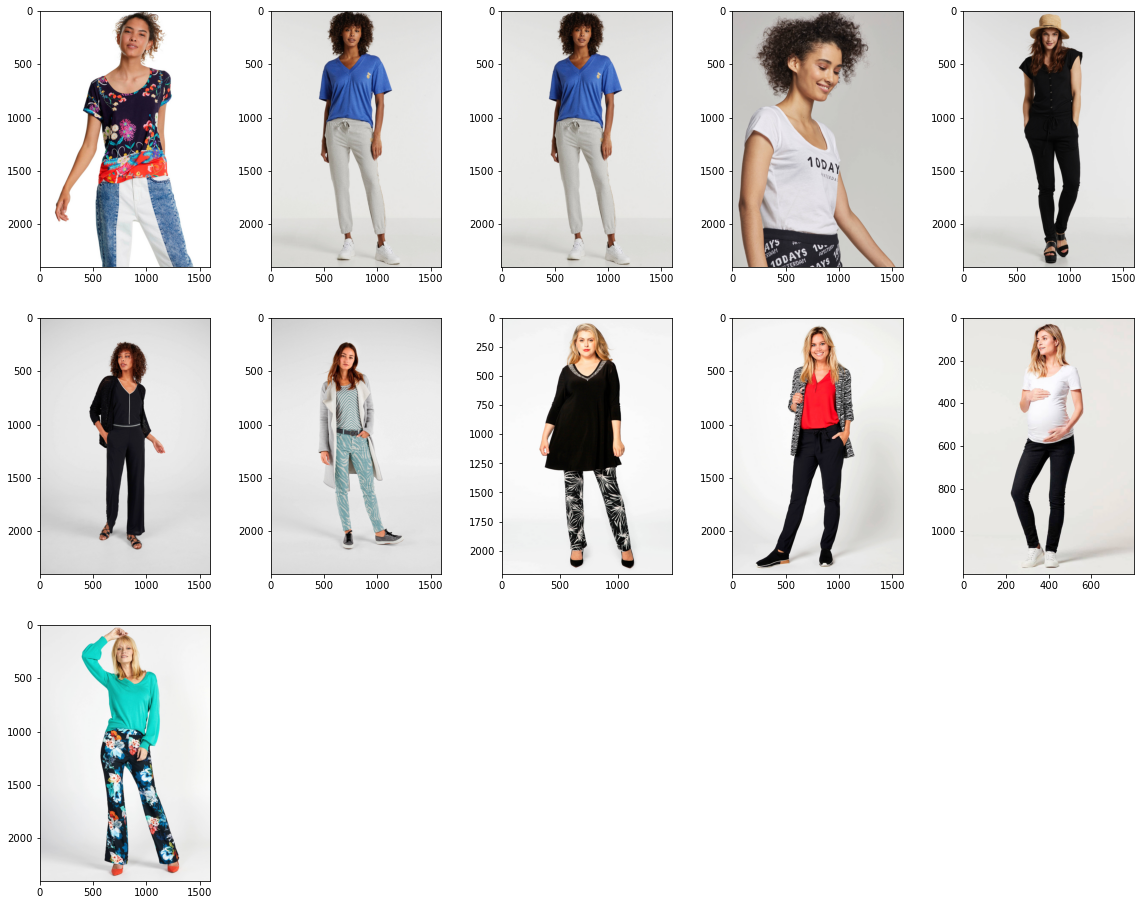

In [124]:
import matplotlib.pyplot as plt
from PIL.Image import Image as PilImage
import textwrap

def display_images(
    images: [PilImage], 
    columns=5, width=20, height=8, max_images=15, 
    label_wrap_length=50, label_font_size=8):

    if not images:
        print("No images to display.")
        return 

    if len(images) > max_images:
        print(f"Showing {max_images} images of {len(images)}:")
        images=images[0:max_images]

    height = max(height, int(len(images)/columns) * height)
    plt.figure(figsize=(width, height))
    for i, image in enumerate(images):

        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.imshow(image)
        
display_images(images)

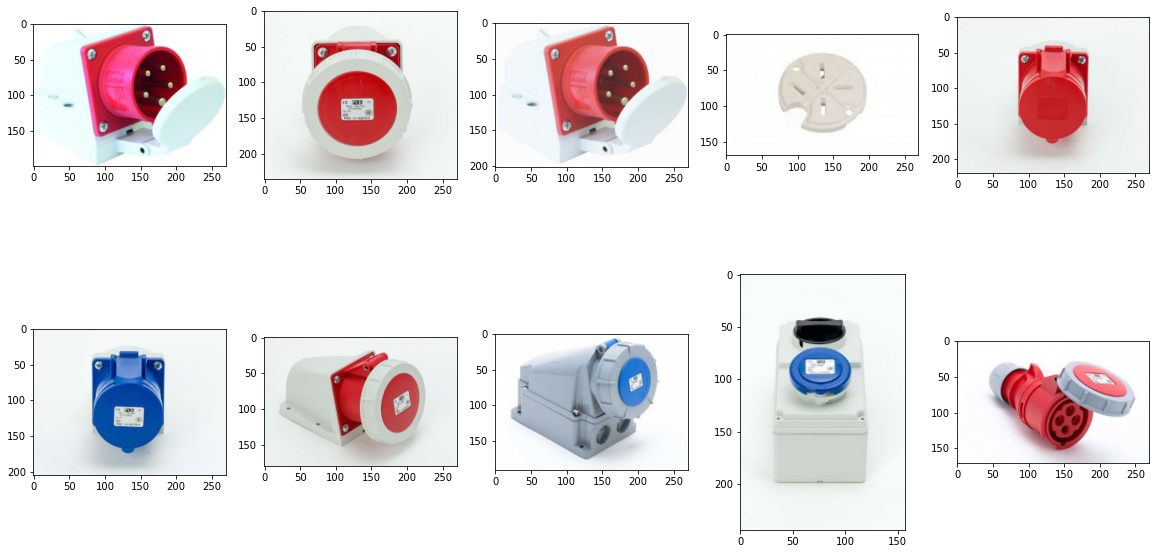

In [140]:
aa = [x[0] for x in df5[0][0:1][0]]
aa1 = [Image.open(x) for x in aa[0:10]]
display_images(aa1)

In [132]:
aa

[[['C:/Users/user/Downloads/obrazy2/3742769.jpg', 6],
  ['C:/Users/user/Downloads/obrazy2/3742669.jpg', 6],
  ['C:/Users/user/Downloads/obrazy2/3742748.jpg', 6],
  ['C:/Users/user/Downloads/obrazy2/3742563.jpg', 6],
  ['C:/Users/user/Downloads/obrazy2/3742674.jpg', 7],
  ['C:/Users/user/Downloads/obrazy2/3742664.jpg', 7],
  ['C:/Users/user/Downloads/obrazy2/3742668.jpg', 7],
  ['C:/Users/user/Downloads/obrazy2/3742685.jpg', 8],
  ['C:/Users/user/Downloads/obrazy2/3742649.jpg', 8],
  ['C:/Users/user/Downloads/obrazy2/3742502.jpg', 8],
  ['C:/Users/user/Downloads/obrazy2/3742662.jpg', 8],
  ['C:/Users/user/Downloads/obrazy2/3742673.jpg', 8],
  ['C:/Users/user/Downloads/obrazy2/3742672.jpg', 8],
  ['C:/Users/user/Downloads/obrazy2/3742712.jpg', 9],
  ['C:/Users/user/Downloads/obrazy2/3742743.jpg', 9],
  ['C:/Users/user/Downloads/obrazy2/3742625.jpg', 9],
  ['C:/Users/user/Downloads/obrazy2/3742580.jpg', 9],
  ['C:/Users/user/Downloads/obrazy2/3742560.jpg', 9],
  ['C:/Users/user/Downloads/

In [ ]:
from IPython.display import display
from ipywidgets import widgets, HBox

imageA = widgets.Image(value=open(aa1x[0], 'rb').read())
imageB = widgets.Image(value=open(aa1x[1], 'rb').read())

hbox = HBox([imageA, imageB])
display(hbox)

# optional: you can show more hboxes, boxes will be arranged vertically
#display(anotherHbox) # 2nd
#display(yetAnotherHbox) # 3rd
#display(andAnotherHbox) # 4th

In [ ]:
import IPython
def showimg(a):
    IPython.display.display(Image.fromarray(a))

aaa = aa1['im1'].to_list()
aaa
#showimg(aaa)